# Sentiment Analysis

Download the Foursquare annotated comments in Brazilian Portuguese: https://www.kaggle.com/thaisalmeida/tips-foursquare/version/1

Place the files in subfolder 'docs/'

In [ ]:
#!wget files if using Google Colab
!wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/preProcessing.py
!wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/Embeddings.py
!wget -q https://raw.githubusercontent.com/douglas125/TextClassification/master/requirements.txt
!pip install -r requirements.txt


#move CSVs to docs/ folder
from google.colab import files
files.upload()

!mkdir docs
!mv *.csv docs/
!ls

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import preProcessing

from sklearn.model_selection import RandomizedSearchCV
pd.set_option('max_colwidth',150)

In [2]:
df = pd.read_csv('docs/tips_scenario1_train.csv')
df.head(16)

,texto,rotulo
0,"A comida é deliciosa, mas pedi limonada suiça e me disseram que hoje estavam todos muito ocupados e que ninguém conseguiria me atender....melhor i...",-1.0
1,"A partir desta sexta feira dia 11 começam a abrir para jantar mas corre pois é só até as 22 hrs e no domingo dia das mães, estarão aberto durante ...",0.0
2,Joint burguer e brewdog,0.0
3,Agora de segunda a sexta o Habanero vai abrir no almoço com pratos mexicanos e tradicionais!,0.0
4,"Experimente o drink ""Dona Diabla"". Muito bom!",1.0
5,Nova senha do Wifi: 1129508219,0.0
6,Wi-fi 1129508219,0.0
7,"Adoramos a pizza carbonara e a paulistana. Não surpreendeu tanto, mas vale a pena por resgatar o tradicionalismo. Dica @Gourmet_For",1.0
8,"O diferencial desse Burger King é que você mesmo serve o refrigerante, e a vontade!",1.0
9,Unico defeito estacionamento pago!,-1.0


In [3]:
preProcessing.clean_text('Este é um teste de 354 números! Mas que: "interessante".')

'este é um teste de 000 números ! mas que : interessante .'

In [4]:
preProcessing.splitWithPunctuation('mas que: "legal"')

['mas', 'que', ':', '"', 'legal', '"']

In [5]:
df.shape

(1714, 2)

# Baseline: Bag of words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
df = df.fillna(0)

In [7]:
texts = df['texto'].astype(str).tolist()
categs = df['rotulo'].tolist()
texts = [preProcessing.clean_text(t) for t in texts]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(texts, categs, test_size=0.1, random_state=42)

In [9]:
countVec = CountVectorizer(max_features=4700, lowercase=False, strip_accents='unicode')
vectTexts_train = countVec.fit_transform(X_train)
vectTexts_test = countVec.transform(X_test)

In [10]:
countVec.vocabulary_

{'achei': 72,
 'comida': 960,
 'bem': 498,
 'mediocre': 2670,
 'prato': 3380,
 'com': 929,
 'muitas': 2845,
 'coisas': 915,
 'mas': 2647,
 'nada': 2878,
 'sabor': 3782,
 'nao': 2885,
 'vale': 4367,
 'que': 3523,
 'custa': 1173,
 'picburguer': 3272,
 'americano': 220,
 'sempre': 3883,
 'muito': 2847,
 'caro': 720,
 'pelo': 3191,
 'tamanho': 4121,
 'fomos': 1889,
 'em': 1476,
 'dois': 1416,
 'gastamos': 2006,
 '00': 0,
 'para': 3105,
 'fast': 1781,
 'food': 1891,
 'de': 1190,
 'normal': 2941,
 'foi': 1879,
 'ojo': 2993,
 'del': 1231,
 'bifefantastico': 515,
 'torta': 4263,
 'bacalhau': 406,
 'maravilhosa': 2628,
 'saladona': 3811,
 'opcao': 3017,
 'por': 3340,
 'reais': 3588,
 'no': 2930,
 'almoco': 190,
 'servico': 3927,
 'gentil': 2030,
 'unico': 4352,
 'problema': 3446,
 'demora': 1253,
 'desnecessario': 1302,
 'colocar': 926,
 'todos': 4235,
 'os': 3039,
 'funcionarios': 1974,
 'trabalhar': 4276,
 'dia': 1336,
 'deveriam': 1329,
 'ter': 4176,
 'dado': 1176,
 'folga': 1881,
 'pois': 3

In [11]:
np.argmax(countVec.transform(['experimente', 'achei', 'caro']), axis=1)

matrix([[1723],
        [  72],
        [ 720]])

In [12]:
vectTexts_train

<1542x4551 sparse matrix of type '<class 'numpy.int64'>'
	with 25320 stored elements in Compressed Sparse Row format>

In [13]:
mnb = MultinomialNB()
mnb.fit(vectTexts_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
mnb.score(vectTexts_train, y_train)

0.9111543450064851

In [15]:
mnb.score(vectTexts_test, y_test)

0.7790697674418605

In [16]:
mnbParams = { #'verbose' : [1],
             'alpha':[0.001, 0.1,1,10, 100],  
             'fit_prior' :[True, False]}
mnbRSCV = RandomizedSearchCV(mnb, mnbParams, verbose=1, return_train_score=True) #, n_jobs=-1)
mnbRSCV.fit(vectTexts_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': [0.001, 0.1, 1, 10, 100], 'fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [17]:
pd.DataFrame(mnbRSCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_prior,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004665,1.886325e-03,0.001333,4.713704e-04,True,0.001,"{'fit_prior': True, 'alpha': 0.001}",0.753398,0.776699,0.757812,0.762646,0.010113,3,0.988315,0.986368,0.990291,0.988325,0.001602
1,0.001999,2.973602e-07,0.001000,1.123916e-07,False,0.001,"{'fit_prior': False, 'alpha': 0.001}",0.745631,0.761165,0.757812,0.754864,0.006680,4,0.988315,0.984421,0.988350,0.987029,0.001844
2,0.001999,1.946680e-07,0.000999,4.899036e-07,True,0.1,"{'fit_prior': True, 'alpha': 0.1}",0.745631,0.763107,0.703125,0.737354,0.025167,5,0.979552,0.980526,0.986408,0.982162,0.003028
3,0.002000,2.973602e-07,0.000666,4.710895e-04,False,0.1,"{'fit_prior': False, 'alpha': 0.1}",0.702913,0.714563,0.664062,0.693904,0.021572,7,0.981500,0.976631,0.980583,0.979571,0.002112
4,0.001999,4.899036e-07,0.000333,4.711456e-04,True,1,"{'fit_prior': True, 'alpha': 1}",0.800000,0.800000,0.791016,0.797017,0.004231,1,0.914314,0.906524,0.909709,0.910182,0.003198
5,0.001999,2.247832e-07,0.000000,0.000000e+00,False,1,"{'fit_prior': False, 'alpha': 1}",0.782524,0.800000,0.771484,0.784695,0.011737,2,0.929893,0.927945,0.930097,0.929312,0.000970
6,0.002000,2.973602e-07,0.000000,0.000000e+00,True,10,"{'fit_prior': True, 'alpha': 10}",0.689320,0.687379,0.693359,0.690013,0.002489,8,0.704966,0.697176,0.692233,0.698125,0.005241
7,0.001999,2.973602e-07,0.000000,0.000000e+00,False,10,"{'fit_prior': False, 'alpha': 10}",0.702913,0.706796,0.714844,0.708171,0.004965,6,0.740019,0.724440,0.722330,0.728930,0.007889
8,0.001999,1.946680e-07,0.000000,0.000000e+00,True,100,"{'fit_prior': True, 'alpha': 100}",0.681553,0.681553,0.683594,0.682231,0.000961,10,0.682571,0.682571,0.681553,0.682232,0.000480
9,0.001999,2.247832e-07,0.000000,0.000000e+00,False,100,"{'fit_prior': False, 'alpha': 100}",0.685437,0.685437,0.689453,0.686770,0.001891,9,0.697176,0.688413,0.689320,0.691636,0.003935


In [18]:
mnbRSCV.best_estimator_.score(vectTexts_test, y_test)

0.7790697674418605

# Word Embedding Class

In [19]:
from Embeddings import WordEmbeddingBR, splitWithPunctuation
import numpy as np

In [20]:
WordEmbeddingBR.downloadNILCEmbeddings()
WordEmbeddingBR.getAvailableEmbeddings()

glove50 exists. Skipping.
cbow50_wang2vec exists. Skipping.
cbow50_fasttext exists. Skipping.
skip50_word2vec exists. Skipping.
Done!


['cbow50_fasttext',
 'cbow50_wang2vec',
 'glove1000',
 'glove50',
 'skip50_word2vec',
 'skip_s300_word2vec',
 'wang2vec_skip600']

In [21]:
wee = WordEmbeddingBR('skip_s300_word2vec')
#wee = WordEmbeddingBR('cbow50_wang2vec')

Reading embedding file: cbow50_wang2vec.zip


934967it [00:33, 28225.54it/s]


In [22]:
classifiers = wee.TrainBaselineClassifiers(X_train, y_train, n_iter=8)

Fitting Support Vector Machine...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   38.6s finished


[LibSVM]Fitting Gradient Boosted Tree...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
      Iter       Train Loss   Remaining Time 
         1         792.2168           14.58s
         2         683.4647           10.70s
         3         606.6007            9.33s
         4         545.3375            8.73s
         5         501.5752            8.23s
         6         458.4456            7.95s
         7         426.4868            7.70s
         8         391.9938            7.50s
         9         364.0820            7.37s
        10         343.4600            7.22s
        20         197.6383            5.96s
        30         128.3983            5.12s
        40          85.1715            4.34s
        50          58.8923            3.61s
        60          41.6619            2.91s
        70          29.2244            2.22s
        80          20.5887            1.54s
        90          14.6022            0.87s
       100          10.3200            0.20

         9         738.2905           48.33s
        10         718.4540           48.14s
        20         559.0625           46.35s
        30         445.5576           44.95s
        40         363.7820           43.44s
        50         303.3545           41.98s
        60         251.8509           40.65s
        70         212.4693           39.35s
        80         181.2654           38.03s
        90         157.3126           36.63s
       100         136.3867           35.31s
       200          40.5146           22.14s
       300          15.8539            9.12s
      Iter       Train Loss   Remaining Time 
         1         494.0948           58.54s
         2         282.7857            1.06m
         3         164.0005            1.10m
         4          96.4842            1.12m
         5          60.1979            1.12m
         6          38.5751            1.13m
         7          23.6158            1.12m
         8          14.6580            1.12m
         

       200          36.1706           12.32s
       300          13.7458            5.74s
      Iter       Train Loss   Remaining Time 
         1         895.7825           27.47s
         2         836.6295           27.40s
         3         784.5114           27.33s
         4         739.4746           27.35s
         5         700.9082           27.18s
         6         667.1912           27.11s
         7         636.1732           27.37s
         8         609.2906           27.30s
         9         583.9537           27.19s
        10         563.4673           27.24s
        20         407.4812           25.77s
        30         315.7037           24.81s
        40         260.2215           23.93s
        50         219.3880           23.23s
        60         186.0205           22.37s
        70         159.3622           21.60s
        80         135.8430           20.84s
        90         118.7910           20.08s
       100         103.5890           19.36s
       20

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  8.6min finished


      Iter       Train Loss   Remaining Time 
         1        1073.6940            1.07m
         2         838.9251            1.06m
         3         670.7632            1.06m
         4         556.6949            1.06m
         5         464.9471            1.06m
         6         399.5829            1.06m
         7         351.5738            1.06m
         8         301.4647            1.06m
         9         271.9807            1.05m
        10         239.0724            1.05m
        20          85.7936            1.00m
        30          38.1030           57.58s
        40          19.0495           55.29s
        50          11.0590           53.18s
        60           7.6833           50.91s
        70           6.2398           48.56s
        80           5.3610           46.37s
        90           4.9729           44.03s
       100           4.6669           41.85s
       200           4.3030           18.80s
       300           4.2087            4.33s


In [23]:
wee.TestBaselineClassifiers(X_train, y_train, classifiers)

{'SVM': 0.9902723735408561, 'GradientBoostingClassifier': 0.9980544747081712}

In [24]:
wee.TestBaselineClassifiers(X_test, y_test, classifiers)

{'SVM': 0.8023255813953488, 'GradientBoostingClassifier': 0.7383720930232558}

In [89]:
svmRSCV.best_estimator_.score(vectTexts_test, y_test)

0.8081395348837209

# RNN

Base: Bidirectional Attention Flow for Machine Comprehension https://arxiv.org/abs/1611.01603

TODO: Write data generator, model compatible with scikit-learn RandomSearchCV

Inputs to the model:

- Integer codes of each word
- Integer codes of each character of each word
- Pretrained embeddings for each word

## Step 1: Encode characters

For the character embedding layer, we will use all available characters plus the [PAD] character.

In [135]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

##############
#Dictionaries
##############

#for all dicts, add 1 to result and reserve 0 to not found
from sklearn.feature_extraction.text import CountVectorizer
import string

allchars = string.printable
allchars = [x for x in allchars] + ['PAD']
allchars = { allchars[i]:i for i in range(len(allchars)) if allchars[i] not in [' ','\n']}

def extractVocabulary(textSet, maxWords = 3000):
    #extracts vocabulary from a list of texts
    #preprocessing to remove accents and uppercase should be done before
    
    countVec = CountVectorizer(max_features=maxWords, lowercase=False, strip_accents=None)
    countVec.fit(textSet)
    
    #append punctuation
    vocab = countVec.vocabulary_
    n = len(vocab)
    for x in string.punctuation:
        vocab[x]=n
        n += 1
    
    return vocab

def sentence2code(sentence, vocabulary, embClass = None):
    """
    Converts a sentence to char embedding codes, word embedding codes and embeddings
    
    vocabulary - dictionary that maps words to integers
    sentence - list of words in the sentence, usually from preProcessing.clean_text().split(' ')
    embClass - a class that implements method encodeWord and has property embDim (embedding dimension)
    """
    
    assert type(sentence) == list, 'sentence should be a list of words'
    
    #sentence
    sentCode = [vocabulary.get(w,-1)+1 for w in sentence]
    
    #characters
    sent_len = len(sentence)
    maxwlen = np.max([len(x) for x in sentence])
    charCodes = np.zeros( (sent_len, maxwlen) ) + allchars['PAD']
    
    for i in range(sent_len):
        charEnc = [allchars.get(cc, -1)+1 for cc in sentence[i]]
        charCodes[i, 0:len(charEnc)] = charEnc
    
    wordEmbeddings = None
    if embClass is not None:
        wordEmbeddings = np.zeros ((sent_len, embClass.embDim))
        for i in range(sent_len):
            wordEmbeddings[i] = embClass.encodeWord(sentence[i])
        
    return np.array(sentCode), charCodes.astype(int), wordEmbeddings


##############
#Keras models
##############
from sklearn import preprocessing

#change LSTM to CuDNNLSTM
from keras.layers import LSTM #CuDNNLSTM as LSTM
from keras.layers import Input, Embedding, Conv2D, Lambda, Concatenate, Bidirectional, TimeDistributed, Dense
from keras.models import Model, load_model
from keras import backend as K

def createCharEncoder(charDictSize, embSize, nFiltersNGram=16, filterSize = 5):
    """
    Creates a character encoder. Receives the integer code of the character.
    
    charDictSize - Length of dictionary of characters
    embSize - Embedding size
    """
    inp = Input((None, ))
    
    embedded = Embedding(charDictSize, embSize)(inp)
        
    embedded = Lambda(lambda x: K.expand_dims(x))(embedded)
    ngram = Conv2D(nFiltersNGram, kernel_size = (5,1), padding='same', activation='relu')(embedded)
    ngram = Conv2D(1, kernel_size = (filterSize,1), padding='same', activation=None)(ngram)
    
    ngram = Lambda(lambda x: K.squeeze(x, axis=3))(ngram)
    ngram = Bidirectional(LSTM(embSize//2))(ngram)
    
    output = ngram
    
    model = Model(inputs=[inp], outputs=[output], name='CharEncoder')
    return model

def createDocEncoder(dictSize, embSize, nFiltersWordGram = 10, filterSize = 5, embDim = None):
    """
    Creates a document encoder. Receives the integer code of the words.
    
    dictSize - Length of word dictionary
    embSize - Embedding size
    """
    inp = Input((None, ))
    
    embedded = Embedding(dictSize, embSize)(inp)
    
    #combine learned and pretrained embeddings
    if embDim is not None:
        preTrainedEmb = Input((None, embDim))
        embedded = Concatenate()([embedded, preTrainedEmb])

    
    embedded = Lambda(lambda x: K.expand_dims(x))(embedded)
    ngram = Conv2D(nFiltersWordGram, kernel_size = (filterSize,1), padding='same', activation='relu')(embedded)
    ngram = Conv2D(1, kernel_size = (filterSize,1), padding='same', activation=None)(ngram)
    
    ngram = Lambda(lambda x: K.squeeze(x, axis=3))(ngram)
    
    output = ngram
    
    if embDim is None:
        model = Model(inputs=[inp], outputs=[output], name='WordEncoder')
    else:
        model = Model(inputs=[inp, preTrainedEmb], outputs=[output], name='WordEncoderWithPreEmb')
    return model  


def createBiDirAttModel(charDictSize, dictSize,
                        charEmbSize=16, nFiltersNGram=16, charfilterSize = 5, #character params
                        wordEmbSize=128, nFiltersWordGram = 10, wordfilterSize = 5, preTrainedEmbDim = None,
                        modelType = 'classifier', nClasses = 3): #word params
    
    inputChars = Input((None, None))
    cFeatLayer = createCharEncoder(charDictSize, charEmbSize, nFiltersNGram, charfilterSize)
    charFeats = TimeDistributed(cFeatLayer)(inputChars)
    
    inputWords = Input((None, ))
    if preTrainedEmbDim is not None:
        preTrainedEmb = Input((None, preTrainedEmbDim))
        wordEncoded = createDocEncoder(dictSize, wordEmbSize, nFiltersWordGram, 
                                       wordfilterSize, preTrainedEmbDim)([inputWords, preTrainedEmb])
    else:
        wordEncoded = createDocEncoder(dictSize, wordEmbSize, nFiltersWordGram, 
                                       wordfilterSize, preTrainedEmbDim)(inputWords)
        
    output = Concatenate()([wordEncoded, charFeats])
    output = Bidirectional(LSTM(wordEmbSize//2, return_sequences=True))(output)

    if modelType == 'classifier':
        output = Bidirectional(LSTM(wordEmbSize, return_sequences=False))(output)
        output = Dense(wordEmbSize//2, activation = 'relu')(output)
        output = Dense(wordEmbSize//4, activation = 'relu')(output)
        output = Dense(nClasses, activation = 'softmax')(output)

    
    if preTrainedEmbDim is None:
        model = Model(inputs=[inputWords, inputChars], outputs=[output], name='BiAttEnc')
    else:
        model = Model(inputs=[inputWords, inputChars, preTrainedEmb], outputs=[output], name='BiAttEncWithPretrainedEmb')
        
        
        
    return model

##############################
#Scikit learn compatible model
##############################
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001                
    drop = 0.6
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 5e-6):
        lrate = 5e-6
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate

class BiDirAttModelClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, nClasses, charDictSize=len(allchars)+2, dictSize = 10000, preTrainedEmbeddings = None,
                 modelFileName='model-text.h5',
                 charEmbSize=16, nFiltersNGram=8, charfilterSize = 4, #character params
                 wordEmbSize=128, nFiltersWordGram = 8, wordfilterSize = 4): #word params
        """
        Initializes classifier
        
        charDictSize - size of character dictionary
        dictSize - word dictionary size (for trainable embeddings)
        """
        self.modelFileName = modelFileName
        
        self.charDictSize = charDictSize
        self.dictSize = dictSize
        self.charEmbSize=charEmbSize
        self.nFiltersNGram=nFiltersNGram
        self.charfilterSize=charfilterSize
        self.wordEmbSize=wordEmbSize
        self.nFiltersWordGram = nFiltersWordGram 
        self.wordfilterSize = wordfilterSize
        
        self.preTrainedEmbDim = None
        self.preTrainedEmbeddings = None
        if preTrainedEmbeddings is not None:
            self.preTrainedEmbDim = preTrainedEmbeddings.embDim
            self.preTrainedEmbeddings = preTrainedEmbeddings
        
        self.initialized = False
    
    def _initModel(self):
        if self.initialized:
            return
        
        self.model_ = createBiDirAttModel(self.charDictSize, self.dictSize,
                                          charEmbSize=self.charEmbSize, nFiltersNGram=self.nFiltersNGram, 
                                          charfilterSize = self.charfilterSize, #character params
                                          wordEmbSize=self.wordEmbSize, nFiltersWordGram = self.nFiltersWordGram, 
                                          wordfilterSize = self.wordfilterSize, preTrainedEmbDim = self.preTrainedEmbDim)
        
        #note that for sparse the target y has to have shape (batch_size, 1) <-the 1 matters
        self.model_.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
        
        self.initialized = True
    
    def preprocess(self, X, y):
        X_wCodes = []
        X_cCodes = []
        X_wEmbs = []
        for s in X:
            wCodes, cCodes, wEmbs = sentence2code(s.split(' '), self.vocab_, self.preTrainedEmbeddings)
            X_wCodes.append(wCodes)
            X_cCodes.append(cCodes)
            X_wEmbs.append(wEmbs)
        
        #self.temp = X_wEmbs
        
        max_sentLen = max([cc.shape[0] for cc in X_cCodes])
        max_wordLen = max([cc.shape[1] for cc in X_cCodes])
        print('Maximum sentence length: {}. Maximum number of chars in a word: {}'.format(max_sentLen, max_wordLen))
        
        X_wCodes_transf = np.zeros( (len(X), max_sentLen), dtype=int )
        X_cCodes_transf = np.zeros( (len(X), max_sentLen, max_wordLen), dtype=int )
        if self.preTrainedEmbeddings is not None:
            X_wEmbs_transf = np.zeros( (len(X), max_sentLen, self.preTrainedEmbeddings.embDim) )
        else:
            X_wEmbs_transf = None        
            
        for i in range(len(X)):
            s_len = X_wCodes[i].shape[0]
            w_len = X_cCodes[i].shape[1]
            X_wCodes_transf[i, 0:s_len] =  X_wCodes[i]
            X_cCodes_transf[i, 0:s_len, 0:w_len] = X_cCodes[i]
            if self.preTrainedEmbeddings is not None:
                X_wEmbs_transf[i, 0:X_wEmbs[i].shape[0], 0:X_wEmbs[i].shape[1]] = X_wEmbs[i]
        
        return X_wCodes_transf,X_cCodes_transf,X_wEmbs_transf, np.expand_dims(self.lblEncoder_.transform(y).astype(int),1)
    
    def fit(self, X, y):
        assert len(X) == len(y), 'X and y must have the same length'

        self.vocab_ = extractVocabulary(X, maxWords=self.dictSize)
        self.dictSize = len(self.vocab_)+1
        
        if not self.initialized:
            self._initModel()
        
        self.lblEncoder_ = preprocessing.LabelEncoder()
        self.y_transf_train = self.lblEncoder_.fit(y)
        
        self.X_wCodes_train,self.X_cCodes_train,self.X_wEmbs_train, self.y_transf_train = self.preprocess(X,y)
            
        checkpointer = ModelCheckpoint(self.modelFileName, verbose=1, save_best_only=True, monitor='val_sparse_categorical_accuracy')    
        lrate = LearningRateScheduler(step_decay)
        earlystopper = EarlyStopping(patience=10, verbose=1, monitor='val_sparse_categorical_accuracy')
        if self.preTrainedEmbeddings is not None:
            self.results_ = self.model_.fit(x=[self.X_wCodes_train, self.X_cCodes_train, self.X_wEmbs_train], y=self.y_transf_train, epochs=35,
                               verbose=1, validation_split=0.2, batch_size=128, callbacks=[checkpointer, earlystopper, lrate])
        else:
            self.results_ = self.model_.fit(x=[self.X_wCodes_train, self.X_cCodes_train], y=self.y_transf_train, epochs=35,
                               verbose=1, validation_split=0.2, batch_size=128, callbacks=[checkpointer, earlystopper, lrate])
            
        # Check that X and y have correct shape
        #X, y = check_X_y(X, y)
        # Store the classes seen during fit
        #self.classes_ = unique_labels(y)

        #self.X_ = X
        #self.y_ = y
        # Return the classifier
        return self

    def predict(self, X):
        X_wCodes_p,X_cCodes_p,X_wEmbs_p, y_transf_train = self.preprocess(X,[])
        
        y = self.model_.predict([X_wCodes_p,X_cCodes_p,X_wEmbs_p])
        y = np.argmax(y, axis=1)
        y = self.lblEncoder_.inverse_transform(y)
        # Check is fit had been called
        #check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        #X = check_array(X)

        #closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return y #self.y_[closest]

In [136]:
bdam = BiDirAttModelClassifier(3, wordEmbSize=64, preTrainedEmbeddings=wee)

In [137]:
bdam.fit(X_train,y_train)

Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 1233 samples, validate on 309 samples
Epoch 1/35
Changing learning rate to 0.001
1233/1233 [==============================] - ETA: 3:39 - loss: 1.0892 - sparse_categorical_accuracy: 0.554 - ETA: 1:54 - loss: 1.0794 - sparse_categorical_accuracy: 0.621 - ETA: 1:15 - loss: 1.0648 - sparse_categorical_accuracy: 0.648 - ETA: 54s - loss: 1.0510 - sparse_categorical_accuracy: 0.662 - ETA: 40s - loss: 1.0323 - sparse_categorical_accuracy: 0.67 - ETA: 28s - loss: 1.0193 - sparse_categorical_accuracy: 0.67 - ETA: 19s - loss: 1.0006 - sparse_categorical_accuracy: 0.68 - ETA: 11s - loss: 0.9974 - sparse_categorical_accuracy: 0.67 - ETA: 4s - loss: 0.9757 - sparse_categorical_accuracy: 0.6780 - 70s 56ms/step - loss: 0.9723 - sparse_categorical_accuracy: 0.6756 - val_loss: 0.9557 - val_sparse_categorical_accuracy: 0.6278

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.62783, saving model to model-text.

1233/1233 [==============================] - ETA: 38s - loss: 0.3041 - sparse_categorical_accuracy: 0.88 - ETA: 33s - loss: 0.2899 - sparse_categorical_accuracy: 0.87 - ETA: 29s - loss: 0.2807 - sparse_categorical_accuracy: 0.88 - ETA: 24s - loss: 0.2921 - sparse_categorical_accuracy: 0.88 - ETA: 20s - loss: 0.2985 - sparse_categorical_accuracy: 0.87 - ETA: 16s - loss: 0.3050 - sparse_categorical_accuracy: 0.87 - ETA: 11s - loss: 0.3050 - sparse_categorical_accuracy: 0.87 - ETA: 7s - loss: 0.3036 - sparse_categorical_accuracy: 0.8809 - ETA: 2s - loss: 0.3000 - sparse_categorical_accuracy: 0.881 - 47s 38ms/step - loss: 0.2932 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.8400 - val_sparse_categorical_accuracy: 0.7508

Epoch 00010: val_sparse_categorical_accuracy did not improve from 0.75405
Epoch 11/35
Changing learning rate to 0.0006
1233/1233 [==============================] - ETA: 38s - loss: 0.2385 - sparse_categorical_accuracy: 0.91 - ETA: 33s - loss: 0.2809 - sparse_categori

1233/1233 [==============================] - ETA: 40s - loss: 0.0497 - sparse_categorical_accuracy: 0.97 - ETA: 35s - loss: 0.0416 - sparse_categorical_accuracy: 0.98 - ETA: 30s - loss: 0.0450 - sparse_categorical_accuracy: 0.98 - ETA: 26s - loss: 0.0545 - sparse_categorical_accuracy: 0.98 - ETA: 21s - loss: 0.0640 - sparse_categorical_accuracy: 0.97 - ETA: 16s - loss: 0.0597 - sparse_categorical_accuracy: 0.98 - ETA: 12s - loss: 0.0634 - sparse_categorical_accuracy: 0.97 - ETA: 7s - loss: 0.0609 - sparse_categorical_accuracy: 0.9756 - ETA: 2s - loss: 0.0567 - sparse_categorical_accuracy: 0.978 - 49s 40ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9781 - val_loss: 1.4460 - val_sparse_categorical_accuracy: 0.7184

Epoch 00019: val_sparse_categorical_accuracy did not improve from 0.75405
Epoch 00019: early stopping


BiDirAttModelClassifier(charDictSize=101, charEmbSize=16, charfilterSize=4,
            dictSize=4741, modelFileName='model-text.h5', nClasses=None,
            nFiltersNGram=8, nFiltersWordGram=8,
            preTrainedEmbeddings=<Embeddings.WordEmbeddingBR object at 0x0000013B6F587588>,
            wordEmbSize=64, wordfilterSize=4)

In [140]:
np.sum(bdam.predict(X_test)==np.array(y_test))/len(X_test)

Maximum sentence length: 47. Maximum number of chars in a word: 16


C:\Users\Douglas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7674418604651163

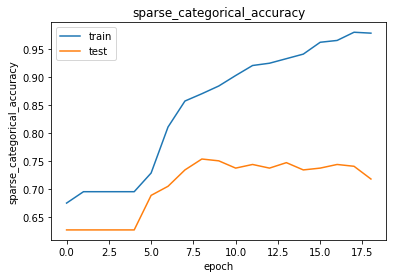

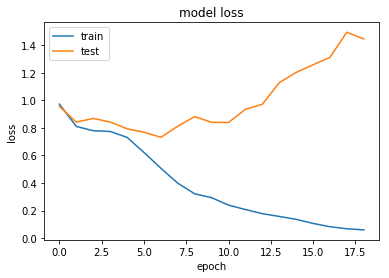

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
results = bdam.results_
# summarize history for intersestion over union
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('sparse_categorical_accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
ans = bdam.model_.predict([bdam.X_wCodes_train, bdam.X_cCodes_train, bdam.X_wEmbs_train], verbose=1)
ans.shape

(1542, 3)

In [62]:
ans[5]

array([0.32663018, 0.3347336 , 0.33863625], dtype=float32)

In [47]:
np.max(bdam.X_cCodes_train)

100

Maximum sentence length: 49. Maximum number of chars in a word: 46
Train on 1387 samples, validate on 155 samples
Epoch 1/5


InvalidArgumentError: indices[74,1] = 100 is not in [0, 100)
	 [[Node: time_distributed_1/embedding_1/embedding_lookup = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@training/Adam/Assign_17"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_1/embeddings/read, time_distributed_1/embedding_1/Cast, training/Adam/gradients/time_distributed_1/embedding_1/embedding_lookup_grad/concat/axis)]]

In [142]:
bdam.y_transf_train

array([[0],
       [1],
       [0],
       ...,
       [2],
       [2],
       [2]])

In [ ]:
wee.

In [43]:
X_train[0]

'achei a comida bem medíocre . prato com muitas coisas , mas nada com sabor . não vale o que custa .'

In [36]:
tt = bdam.lblEncoder_.transform([-1,1,0]).astype(int)
print(tt)
bdam.lblEncoder_.inverse_transform(tt)

[0 2 1]


C:\Users\Douglas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([-1.,  1.,  0.])

In [73]:
bdam.model_.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
input_40 (InputLayer)           (None, None, None)   0                                            
__________________________________________________________________________________________________
WordEncoder (Model)             (None, None, 128)    1280111     input_42[0][0]                   
__________________________________________________________________________________________________
time_distributed_9 (TimeDistrib (None, None, 2)      525         input_40[0][0]                   
__________________________________________________________________________________________________
concatenat

In [74]:
y_train

[-1.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0

In [26]:
X_train[8]

'bons cortes grelhados , especialmente o galeto . buffet de saladas bom , com destaque para os legumes grelhados . atendimento rápido e pratos idem . preço mais caro , mas vale pela comida deliciosa .'

In [27]:
vocab = extractVocabulary(X_train, maxWords=10000,)

In [28]:
len(X_train[8].split(' '))

36

In [29]:
sentence2code(X_train[8].split(' '), vocab, embClass=wee)[2]

array([[-0.233608,  0.165974, -0.051004, ..., -0.107206,  0.082516,
         0.088683],
       [-0.094895,  0.101375, -0.111975, ..., -0.021888, -0.060563,
         0.145541],
       [ 0.087262,  0.117833, -0.032012, ..., -0.292878, -0.085171,
        -0.281145],
       ...,
       [ 0.291259,  0.107393,  0.136992, ..., -0.208725,  0.023768,
         0.128399],
       [ 0.223499, -0.257117,  0.134983, ...,  0.073602,  0.179686,
        -0.071289],
       [-0.232425, -0.06775 , -0.238036, ...,  0.046183,  0.13444 ,
        -0.125707]])

# Keras prototyping

In [50]:
m=createDocEncoder(4000,200, embDim=50)
m.summary()
#plot_model(m, to_file='wordEncoder.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, None, 200)    800000      input_11[0][0]                   
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, None, 50)     0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, None, 250)    0           embedding_6[0][0]                
                                                                 input_12[0][0]                   
__________

In [51]:
m = createCharEncoder(100, 16)
m.summary()
#plot_model(m, to_file='characterEncoder.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None)              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 16)          1600      
_________________________________________________________________
lambda_13 (Lambda)           (None, None, 16, 1)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, None, 16, 16)      96        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, None, 16, 1)       81        
_________________________________________________________________
lambda_14 (Lambda)           (None, None, 16)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                4352      
Total para

In [53]:
m = createBiDirAttModel(16, 3000, preTrainedEmbDim=50)
m.summary()

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_20:0", shape=(?, ?, ?), dtype=float32) at layer "input_20". The following previous layers were accessed without issue: []